In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
plt.rcParams.update({'font.size':15})

In [ ]:
plt.style.use('dark_background')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DataSet/TaxiFare.csv")

### **DATA UNDERSTANDING**




In [ ]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [ ]:
df.shape

(50000, 8)

In [ ]:
df.head().style.set_properties(
**{
    'background-color':'green',
    'color':'white',
    'border-color':'red'
})

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.head().style.set_properties(
**{
    'background-color':'green',
    'color':'white',
    'border-color':'red'
})

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
df.sample(10).style.set_properties(
**{
    'background-color':'green',
    'color':'white',
    'border-color':'red'
})

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
17280,56:18.0,11.700000,2012-08-14 09:56:18 UTC,-73.982361,40.761823,-73.993073,40.734183,4
38538,29:09.0,20.000000,2013-07-12 00:29:09 UTC,-74.005541,40.736626,-73.956481,40.781264,1
4895,49:00.0,13.700000,2010-09-21 16:49:00 UTC,-73.971110,40.767340,-73.992218,40.749417,2
8913,39:00.0,8.000000,2013-11-22 19:39:00 UTC,-73.996017,40.738547,-73.987665,40.728580,2
22681,55:00.0,8.500000,2012-03-23 03:55:00 UTC,-73.991157,40.723967,-74.007078,40.743432,1
11070,47:30.0,7.300000,2009-01-27 11:47:30 UTC,-74.007255,40.705493,-74.000277,40.718427,1
22970,48:00.0,8.500000,2011-05-26 19:48:00 UTC,-73.984155,40.756672,-74.000502,40.730113,1
17023,04:40.0,8.900000,2010-12-13 23:04:40 UTC,-73.997320,40.752296,-73.982156,40.728194,1
31467,04:00.0,8.000000,2012-09-25 11:04:00 UTC,-73.985052,40.760377,-73.998140,40.750772,1
40026,32:00.0,9.500000,2013-02-23 10:32:00 UTC,-73.999160,40.739377,-73.977357,40.764160,1


In [ ]:
column_name = 'longitude_of_pickup'
df = df[df[column_name] != 0]

In [ ]:
column_name = 'longitude_of_pickup'
df = df[df[column_name] != 0]
date_column = 'date_time_of_pickup'
characters_to_remove = 'UTC'
df[date_column] = df[date_column].str.replace(characters_to_remove, '')

In [ ]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:

from math import radians, cos, sin, asin, sqrt

In [ ]:
def haversine(lon1_array, lat1_array, lon2_array, lat2_array):

    distances = []

    for pos in range(len(lon1_array)):
        lon1, lat1, lon2, lat2 = map(radians, [lon1_array[pos], lat1_array[pos], lon2_array[pos], lat2_array[pos]])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a))*6371
        distances.append(c)
    return distances

df['dist_km'] = haversine(df['longitude_of_pickup'].to_numpy(),df['latitude_of_pickup'].to_numpy(),df['longitude_of_dropoff'].to_numpy(),df['latitude_of_dropoff'].to_numpy())
df.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


# **CONVERTING TIMESTAMP**

In [ ]:
import time

In [ ]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], errors='coerce')
df = df.assign(hour = df.date_time_of_pickup.dt.hour, month = df.date_time_of_pickup.dt.month, year = df.date_time_of_pickup.dt.year, weekday = df.date_time_of_pickup.dt.weekday)
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday
0,26:21.0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0
1,52:16.0,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1
2,35:00.0,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3
3,30:42.0,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5
4,51:00.0,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1


In [ ]:
df.drop(columns=['unique_id','date_time_of_pickup'],axis=1,inplace=True, errors='ignore')
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1


# **Exploratory Data Analysis(EDA)**

# **Normal Working Days**

<Axes: title={'center': 'Number of Taxi Trips During Normal Working Days'}, xlabel='hour', ylabel='count'>

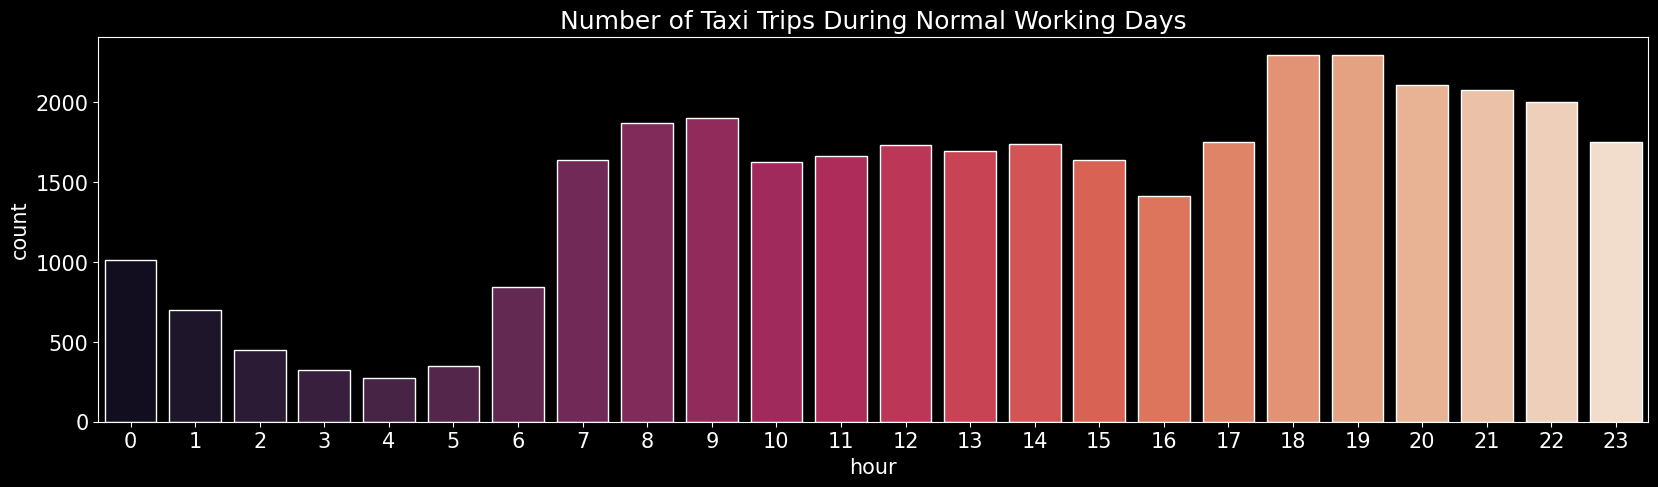

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Number of Taxi Trips During Normal Working Days')
sns.set_style("white")
sns.countplot(x='hour', data=df.loc[(df.weekday >= 0) & (df.weekday <= 4)],palette='rocket')

# **Weekends**


<Axes: title={'center': 'Number of Taxi Trips During Weekends'}, xlabel='hour', ylabel='count'>

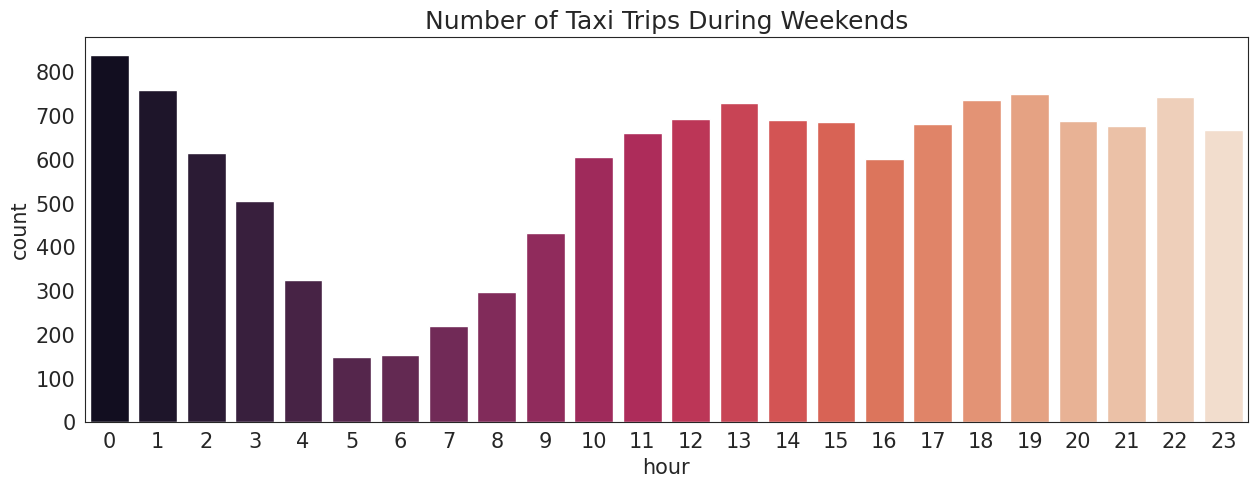

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Number of Taxi Trips During Weekends')
sns.set_style("white")
sns.countplot(x='hour', data=df.loc[(df.weekday >= 5) & (df.weekday <= 6)],palette='rocket')

#  Hours and Mean Fare Amount - Working Weekdays vs Weekends

In [ ]:
weekdays = df.loc[(df.weekday >= 0) & (df.weekday <= 5)]
weekends =  df.loc[(df.weekday >= 6) & (df.weekday <= 7)]
weekdays_fare = weekdays.groupby(['hour']).amount.mean().to_frame().reset_index()
weekends_fare = weekends.groupby(['hour']).amount.mean().to_frame().reset_index()

In [ ]:
np.array(weekdays_fare.hour)
np.array(weekends_fare.amount)

array([11.41060748, 10.80874036, 11.161375  , 12.52539623, 12.74516667,
       14.15088608, 15.61382353, 13.76771084, 11.75533333, 10.93126214,
       10.28533569, 10.78231746, 10.79937685, 11.88692529, 12.32377465,
       12.02094937, 11.64309353, 11.32804348, 11.80533951, 11.0222293 ,
       11.18774648, 10.55584906, 11.88470588, 11.9515812 ])

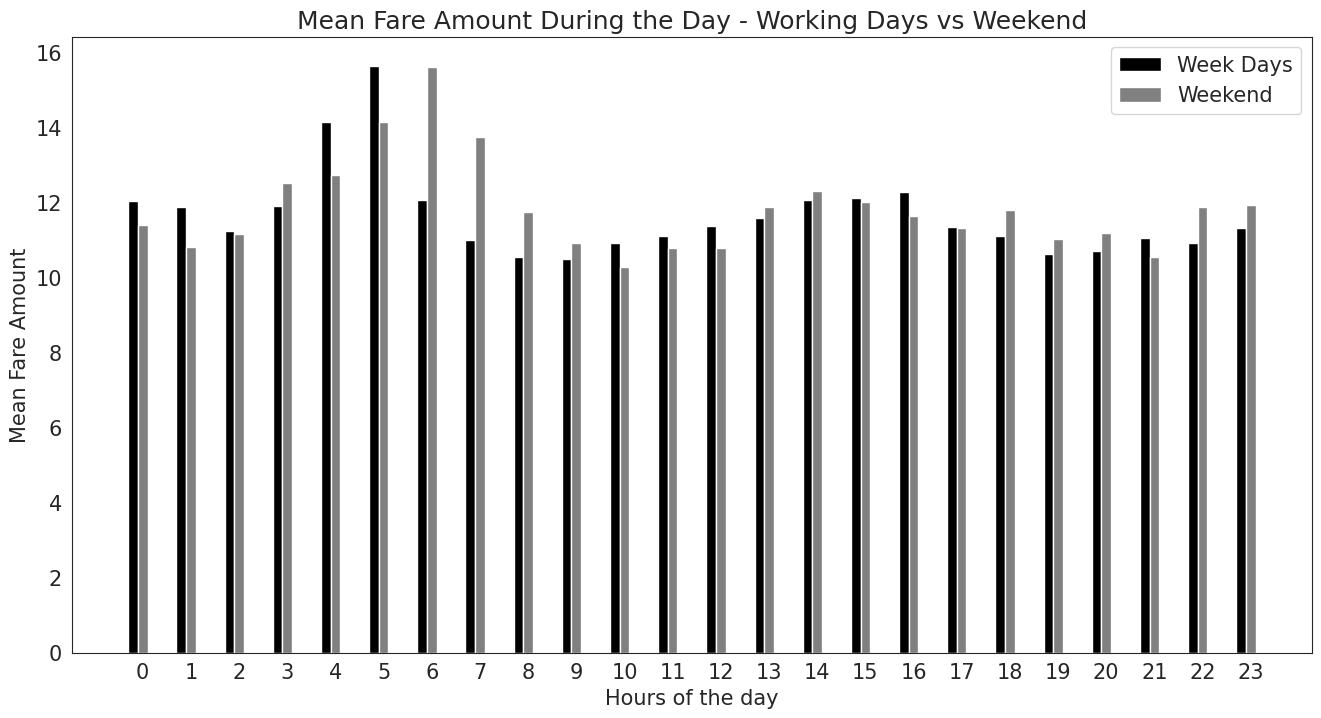

In [ ]:
x = np.array(weekdays_fare.hour)
y = np.array(weekdays_fare.amount)
z = np.array(weekends_fare.amount)


plt.figure(figsize=(16,8))
plt.title('Mean Fare Amount During the Day - Working Days vs Weekend')
plt.xlabel('Hours of the day')
plt.ylabel('Mean Fare Amount')
ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='black', align='center',label = 'Week Days')
ax.bar(x, z, width=0.2, color='gray', align='center', label = 'Weekend')
plt.xticks(range(0,24))
plt.legend()
plt.show()

# **Passenger Count Distribution**

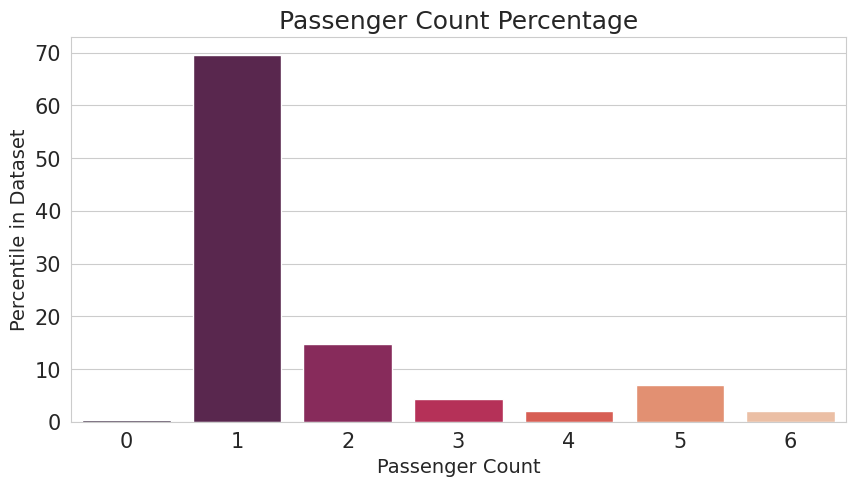

In [ ]:
passengers = df['no_of_passenger'].value_counts().to_frame()
count = passengers.no_of_passenger.sum()
passengers['no_of_passenger'] = passengers['no_of_passenger']/count*100
indexes = passengers.index
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.title('Passenger Count Percentage')
plt.xlabel("Passenger Count",fontsize=14)
sns.barplot(x=indexes,y=passengers['no_of_passenger'],palette="rocket")
plt.ylabel("Percentile in Dataset",fontsize=14)
plt.show()

# **Correlation Between Variables Before Cleaning**

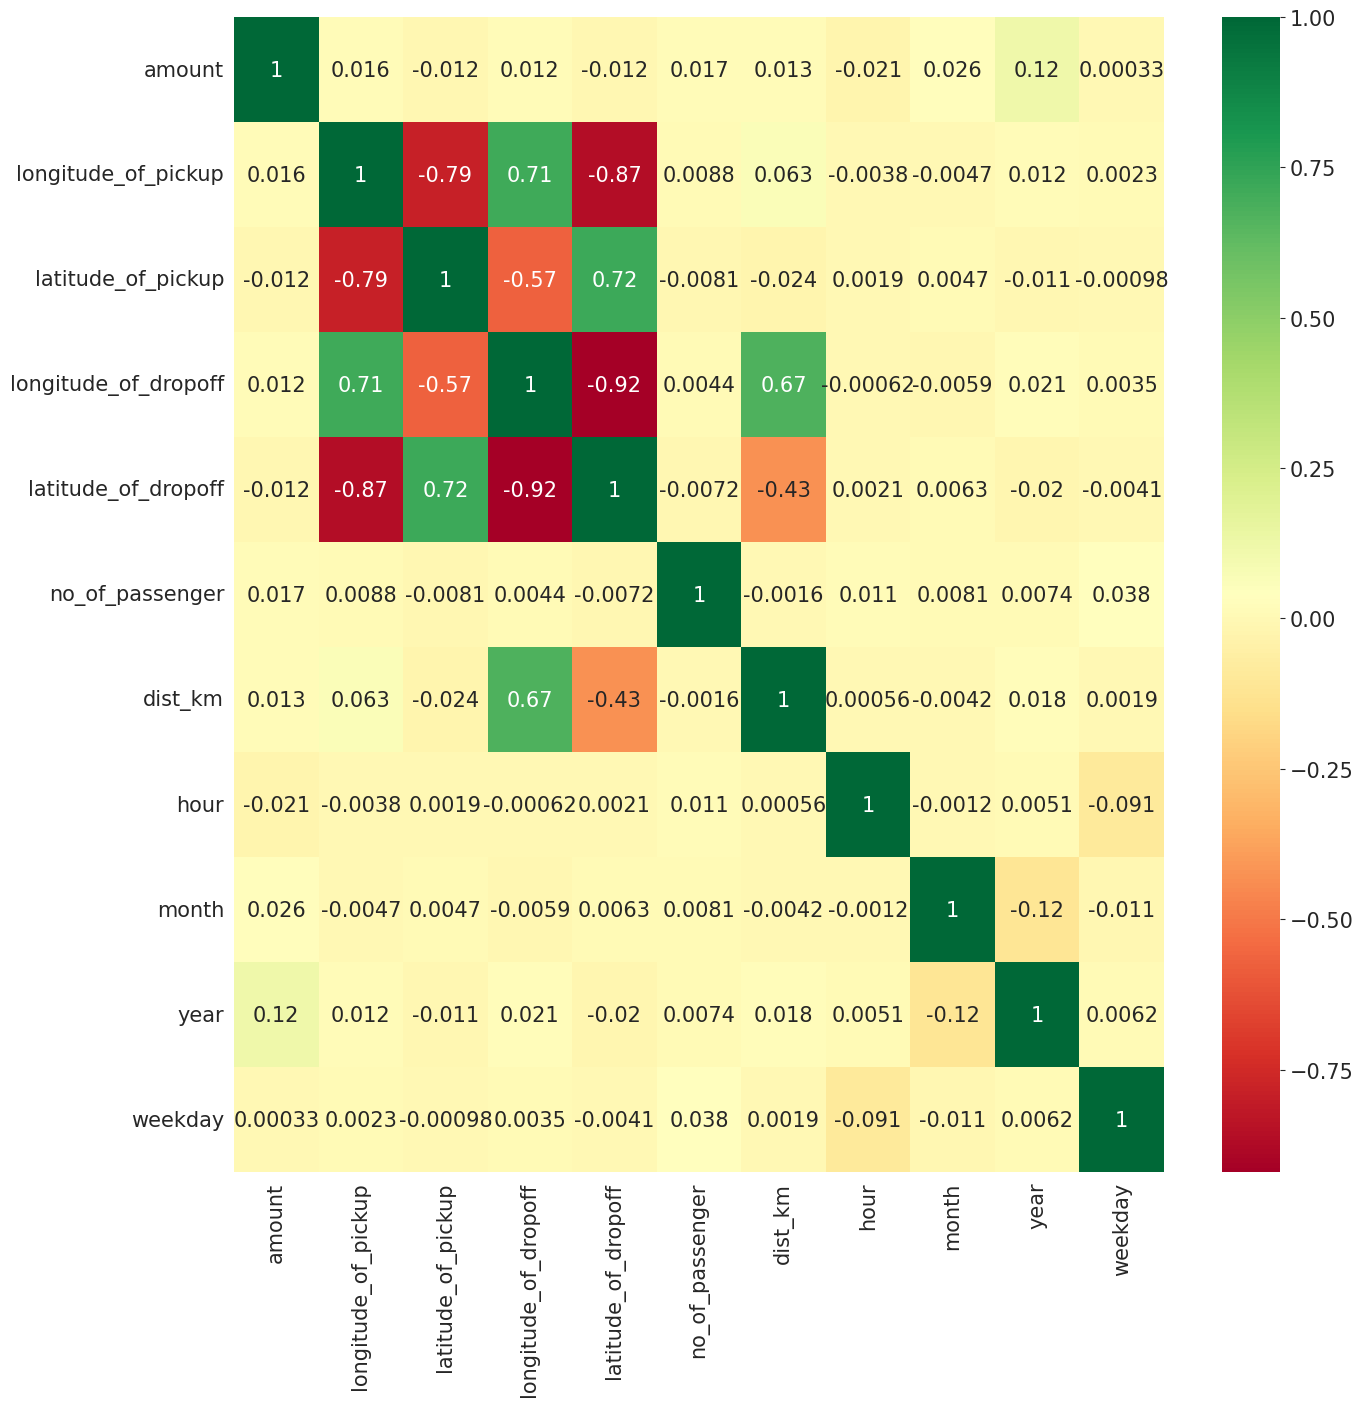

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["amount"])>0.01]
sns.set_style("white")
plt.figure(figsize=(15,15))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

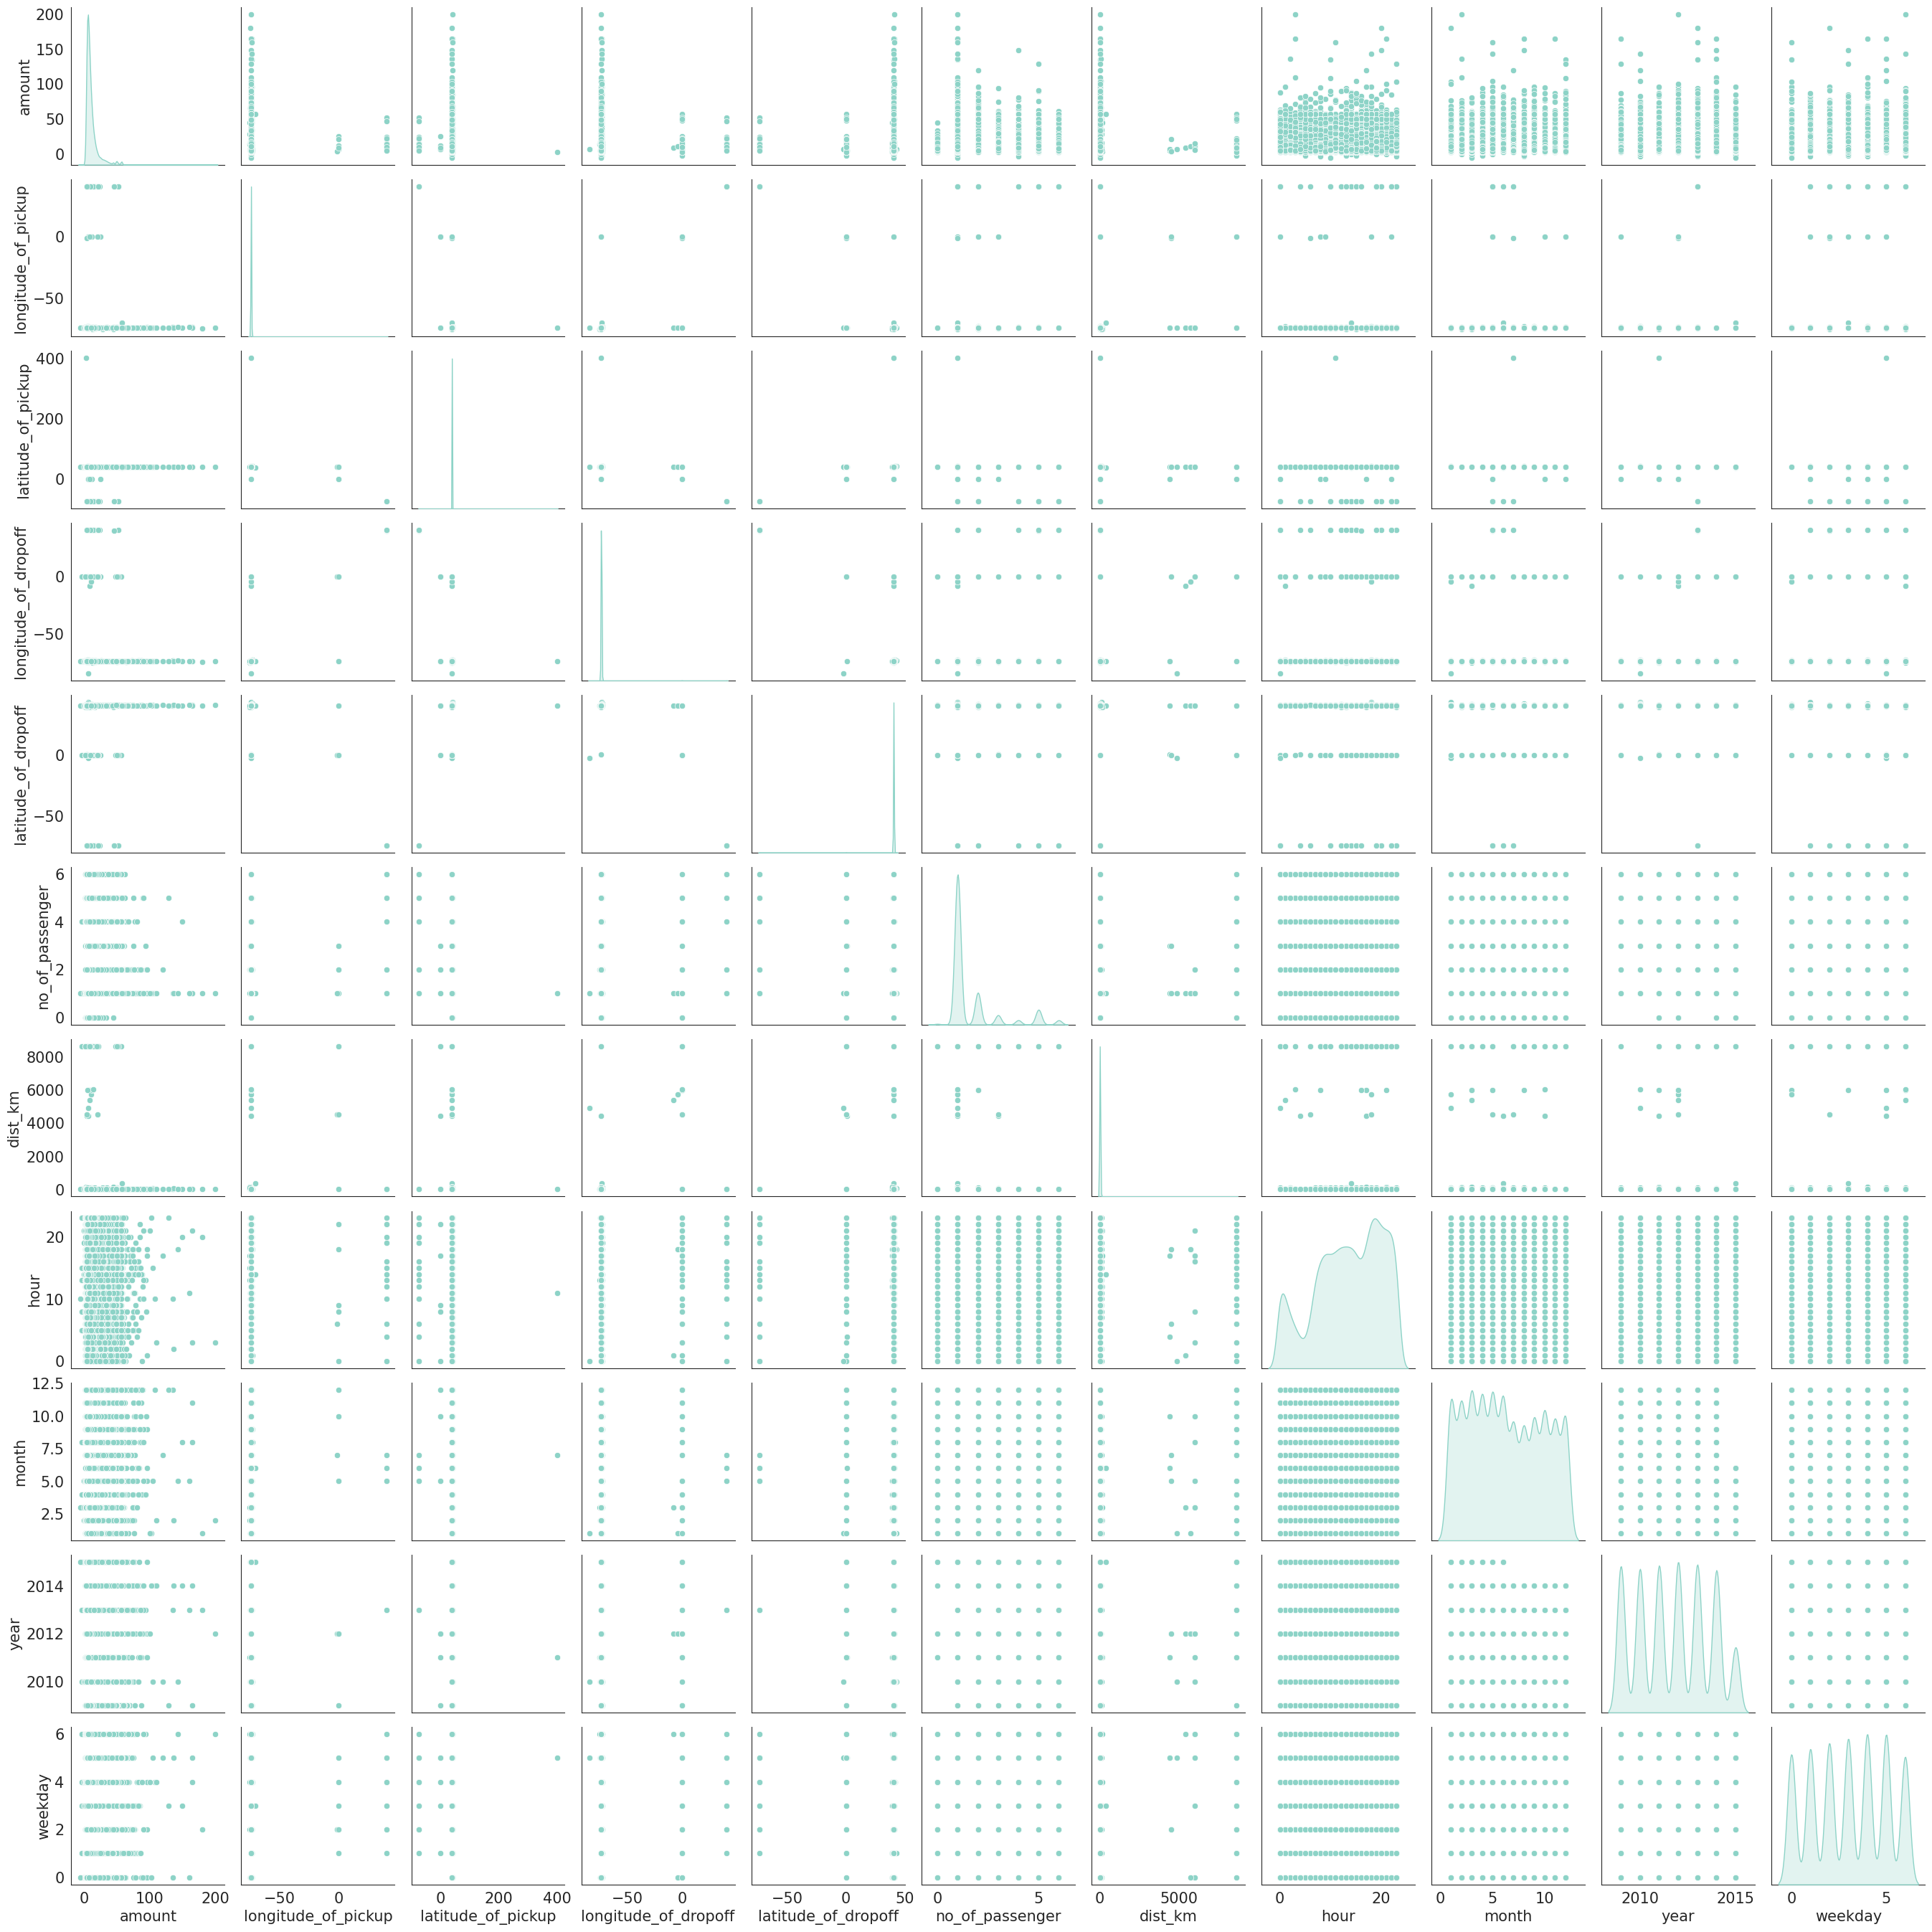

In [ ]:
sns.pairplot(df,diag_kind="kde")

# **Data Cleaning**

In [ ]:
df.isnull().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dist_km                 0
hour                    0
month                   0
year                    0
weekday                 0
dtype: int64

# **Trips Where The Pickup and The Dropoff Coordinates Are The Same**

In [ ]:
same_locations = df[(df['longitude_of_pickup'] == df['longitude_of_dropoff']) & (df['latitude_of_pickup'] == df['latitude_of_dropoff'])].index
same_locations
df[(df['longitude_of_pickup'] == df['longitude_of_dropoff']) & (df['latitude_of_pickup'] == df['latitude_of_dropoff'])]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday
105,52.00,-74.035839,40.747320,-74.035839,40.747320,1,0.0,0,3,2009,2
191,6.50,-73.998488,40.726303,-73.998488,40.726303,1,0.0,21,1,2014,2
270,7.50,-73.995892,40.746454,-73.995892,40.746454,1,0.0,1,8,2012,5
290,6.90,-73.982432,40.745747,-73.982432,40.745747,1,0.0,12,12,2009,0
396,12.00,-73.844904,40.736318,-73.844904,40.736318,1,0.0,18,3,2014,2
503,2.50,-73.998720,40.624708,-73.998720,40.624708,1,0.0,1,1,2010,1
657,2.50,-73.986410,40.763350,-73.986410,40.763350,1,0.0,1,8,2009,1
737,57.33,-73.776477,40.646290,-73.776477,40.646290,2,0.0,19,8,2014,0
808,6.10,-73.984433,40.771084,-73.984433,40.771084,1,0.0,2,10,2010,4
843,5.50,-73.990532,40.719085,-73.990532,40.719085,1,0.0,4,7,2014,5


In [ ]:
df.drop(same_locations,inplace = True,errors='ignore')
print("Remaining dataset rows: ", df.shape[0])

Remaining dataset rows:  48510


# **Unreal Latitude and Longitude**

In [ ]:
df.loc[(df.latitude_of_pickup > 90) | (df.latitude_of_pickup < -90) | (df.latitude_of_dropoff > 90) | (df.latitude_of_dropoff < -90) |
          (df.longitude_of_pickup > 180) | (df.longitude_of_pickup < -180) | (df.longitude_of_dropoff > 180) | (df.longitude_of_dropoff < -180)]

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday
5686,3.3,-73.947235,401.083332,-73.951392,40.778927,1,33.850093,11,7,2011,5


In [ ]:
wrong_coordinates = df.loc[(df.latitude_of_pickup > 90) | (df.latitude_of_pickup < -90) | (df.latitude_of_dropoff > 90) | (df.latitude_of_dropoff < -90) |
          (df.longitude_of_pickup > 180) | (df.longitude_of_pickup < -180) | (df.longitude_of_dropoff > 180) | (df.longitude_of_dropoff < -180)]
df.drop(wrong_coordinates,inplace = True,errors='ignore')
df.shape

(48510, 11)

In [ ]:
outside_boundaries = df.loc[(df.longitude_of_pickup == 0) | (df.latitude_of_pickup == 0) | (df.longitude_of_dropoff == 0) | (df.latitude_of_dropoff == 0)
          | (df.longitude_of_pickup < -74.76) | (df.longitude_of_pickup > -71.93) |
            (df.longitude_of_dropoff < -74.76) | (df.longitude_of_dropoff > -71.93)|
            (df.latitude_of_pickup < 40.56) | (df.latitude_of_pickup > 42.07) |
            (df.latitude_of_dropoff < 40.56) | (df.latitude_of_dropoff > 42.07)].index
df.drop(outside_boundaries, inplace = True, errors='ignore')

In [ ]:
df = df.loc[df.dist_km < 130]

In [ ]:
Manhattan_south_96th = {
    'min_lat': 40.768394,
    'min_long':-73.993352,
    'max_lat': 40.795642,
    'max_long': -73.964942
}

Manhattan_south_96th['min_lat']

40.768394

In [ ]:
df['south_manhattan'] = np.where(((df.latitude_of_pickup > Manhattan_south_96th['min_lat']) & (df.latitude_of_pickup < Manhattan_south_96th['max_lat'])
         & (df.longitude_of_pickup > Manhattan_south_96th['min_long']) & (df.longitude_of_pickup < Manhattan_south_96th['max_long']))
         | ((df.latitude_of_dropoff > Manhattan_south_96th['min_lat']) & (df.latitude_of_dropoff < Manhattan_south_96th['max_lat'])
         & (df.longitude_of_dropoff > Manhattan_south_96th['min_long']) & (df.longitude_of_dropoff < Manhattan_south_96th['max_long'])), 1, 0)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday,south_manhattan
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1,0


In [ ]:
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

df['Manhattan_JFK'] = np.where(((df.latitude_of_pickup > JFK['min_lat']) & (df.latitude_of_pickup < JFK['max_lat']) & (df.longitude_of_pickup > JFK['min_long'])
          & (df.longitude_of_pickup < JFK['max_long'])) & ((df.latitude_of_dropoff > Manhattan['min_lat']) & (df.latitude_of_dropoff < Manhattan['max_lat'])
          & (df.longitude_of_dropoff < Manhattan['max_long']) & (df.longitude_of_dropoff > Manhattan['min_long']))
         | ((df.latitude_of_pickup > Manhattan['min_lat']) & (df.latitude_of_pickup < Manhattan['max_lat']) & (df.longitude_of_pickup > Manhattan['min_long'])
          & (df.longitude_of_pickup < Manhattan['max_long'])) & ((df.latitude_of_dropoff > JFK['min_lat']) & (df.latitude_of_dropoff < JFK['max_lat'])
          & (df.longitude_of_dropoff < JFK['max_long']) & (df.longitude_of_dropoff > JFK['min_long'])), 1,0)

df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday,south_manhattan,Manhattan_JFK
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1,0,0


In [ ]:
df['Manhattan_JFK_rush'] = np.where((df.Manhattan_JFK == 1) & ((df.hour >=16) & (df.hour <=20) & (df.weekday >= 0) & (df.weekday <=4)),1,0)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday,south_manhattan,Manhattan_JFK,Manhattan_JFK_rush
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1,1,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1,0,0,0


In [ ]:
LGA = {
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79
}

df['LGA_pick_drop'] = np.where(((df.latitude_of_pickup > LGA['min_lat']) & (df.latitude_of_pickup < LGA['max_lat']) & (df.longitude_of_pickup > LGA['min_long'])
          & (df.longitude_of_pickup < LGA['max_long'])) | ((df.latitude_of_dropoff > LGA['min_lat']) & (df.latitude_of_dropoff < LGA['max_lat']) & (df.longitude_of_dropoff > LGA['min_long'])
          & (df.longitude_of_dropoff < LGA['max_long'])),1,0)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday,south_manhattan,Manhattan_JFK,Manhattan_JFK_rush,LGA_pick_drop
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1,1,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3,0,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5,0,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1,0,0,0,0


In [ ]:
df['overnight'] = np.where(((df.hour >= 20) | (df.hour <=6)),1,0)
df.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist_km,hour,month,year,weekday,south_manhattan,Manhattan_JFK,Manhattan_JFK_rush,LGA_pick_drop,overnight
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,17,6,2009,0,0,0,0,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,16,1,2010,1,1,0,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,0,8,2011,3,0,0,0,0,1
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,4,4,2012,5,0,0,0,0,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,7,3,2010,1,0,0,0,0,0


In [ ]:
df['rush_hour'] =  np.where(((df.hour >= 16) & (df.hour <= 20)) & ((df.weekday >= 0 ) & (df.weekday <=4)),1,0)


# **LINEAR REGRESSION**

In [ ]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [ ]:
model_1.score(x_train,y_train)

0.7037375247869369

In [ ]:
model_1.score(x_test,y_test)

0.6980012545063146

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

poly_cf=linear_model.LinearRegression()
poly_cf.fit(x_train2,y_train)

print(poly_cf.score(x_train2,y_train))

0.7970014699051189


In [ ]:
print(poly_cf.score(x_test2,y_test))

0.7923799131694054


# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor(max_depth=3)
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
model3.score(x_train,y_train)

0.7538165982029101

In [ ]:

model3.score(x_test,y_test)

0.7525919470949127

# **BAGGING MODEL**

In [ ]:
from sklearn.ensemble import BaggingRegressor
bgcl=BaggingRegressor(n_estimators=100,base_estimator=model3,random_state=0)
bgcl=bgcl.fit(x_train,y_train)
y_predict=bgcl.predict(x_test)
print(bgcl.score(x_test,y_test))

0.7644357665666078


In [ ]:
print(bgcl.score(x_train,y_train))

0.7674352321404793


# **BOOSTING**

**ADA BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abcl=AdaBoostRegressor(n_estimators=3,random_state=0,loss='exponential')
abcl=abcl.fit(x_train,y_train)
y_predict=abcl.predict(x_test)
print(abcl.score(x_test,y_test))

0.7165282868347996


In [ ]:
print(abcl.score(x_train,y_train))

0.7280477611462706


**GRADIENT BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl=GradientBoostingRegressor(n_estimators=50,random_state=0)
gbcl=gbcl.fit(x_train,y_train)
y_predict=gbcl.predict(x_test)
print(gbcl.score(x_test,y_test))

0.8385751460170654


In [ ]:
gbcl.score(x_train,y_train)

0.8494480719146325

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfcl=RandomForestRegressor(n_estimators=200,random_state=0,max_features=3)
rfcl=rfcl.fit(x_train,y_train)

In [ ]:
rfcl.score(x_train,y_train)

0.9757744163193213

In [ ]:
rfcl.score(x_test,y_test)

0.8439421773020702

# **SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
from sklearn.svm import SVR
svm=SVR(kernel="linear")
svm.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
svm.score(x_train,y_train)

0.6277260683755541

In [ ]:
svm.score(x_test,y_test)

0.615207335148586




# **THE BEST MODEL FOR THIS DATASET IS GRADIENT BOOSTING REGRESSOR**










